In [13]:
import json
import pandas as pd
import datetime

import matplotlib.pyplot as plt

In [68]:
pd.set_option('display.max_columns', 100)

## Public matches (general info)

In [43]:
with open('../data/public_matches.json') as f:
    public_matches = json.load(f)

In [44]:
public_matches_df = pd.DataFrame(public_matches)
public_matches_df['start_time'] = pd.to_datetime(
    public_matches_df.start_time,unit='s')

In [45]:
public_matches_df.shape

(100000, 14)

In [46]:
public_matches_df.head()

,match_id,match_seq_num,radiant_win,start_time,duration,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster,radiant_team,dire_team
0,6808764902,5701512375,False,2022-10-16 15:33:11,3160,2574.0,1.0,7,22,44,4,184,"8,2,135,39,75","19,129,51,6,84"
1,6808764901,5701493794,True,2022-10-16 15:33:10,2522,3876.0,3.0,7,22,54,8,183,"6,50,49,52,22","44,87,2,74,25"
2,6808764900,5701487411,True,2022-10-16 15:32:57,2252,NaN,NaN,7,22,13,2,251,"19,84,64,16,39","26,12,27,136,8"
3,6808764819,5701481355,False,2022-10-16 15:33:26,2039,4178.0,2.0,7,22,51,4,153,"26,102,41,137,13","106,96,7,52,5"
4,6808764815,5701476969,False,2022-10-16 15:33:21,1930,NaN,NaN,0,4,53,3,274,"12,23,25,20,33","86,101,62,82,109"


In [47]:
public_matches_df.start_time

0       2022-10-16 15:33:11
1       2022-10-16 15:33:10
2       2022-10-16 15:32:57
3       2022-10-16 15:33:26
4       2022-10-16 15:33:21
                ...        
99995   2022-10-15 16:36:48
99996   2022-10-15 16:36:48
99997   2022-10-15 16:36:48
99998   2022-10-15 16:36:42
99999   2022-10-15 16:36:42
Name: start_time, Length: 100000, dtype: datetime64[ns]

<AxesSubplot: >

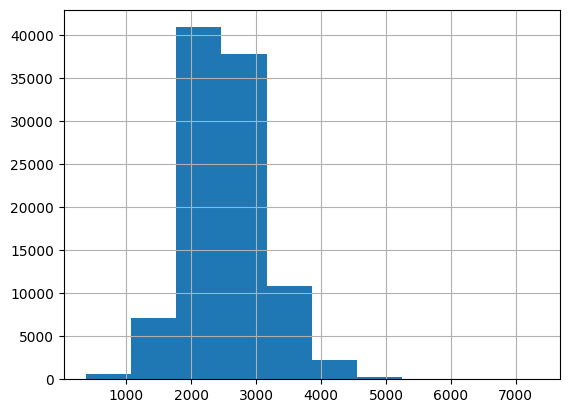

In [48]:
public_matches_df.duration.hist()

In [49]:
public_matches_df.duration.quantile(0.01) / 60

20.649833333333333

<AxesSubplot: >

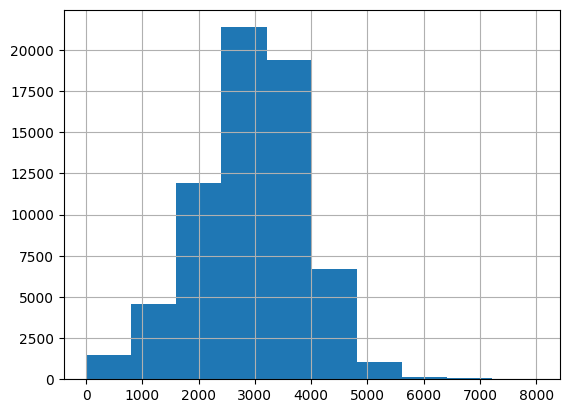

In [50]:
public_matches_df.avg_mmr.hist()

In [51]:
# https://github.com/odota/dotaconstants/blob/master/json/lobby_type.json
public_matches_df.lobby_type.value_counts()

7    76505
0    22855
9      583
1       57
Name: lobby_type, dtype: int64

In [52]:
# https://github.com/odota/dotaconstants/blob/master/json/game_mode.json
public_matches_df.game_mode.value_counts()

22    91595
4      4562
3      2956
2       790
5        95
16        2
Name: game_mode, dtype: int64

<AxesSubplot: >

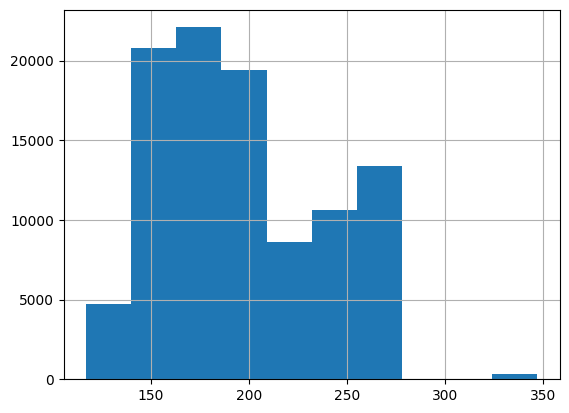

In [53]:
public_matches_df.cluster.hist()

## Public matches details

In [96]:
with open('../data/matches_details.json') as f:
    matches_details = json.load(f)

In [97]:
matches_details_df = pd.DataFrame(matches_details)

In [98]:
matches_details_df.shape

(2901, 46)

<AxesSubplot: >

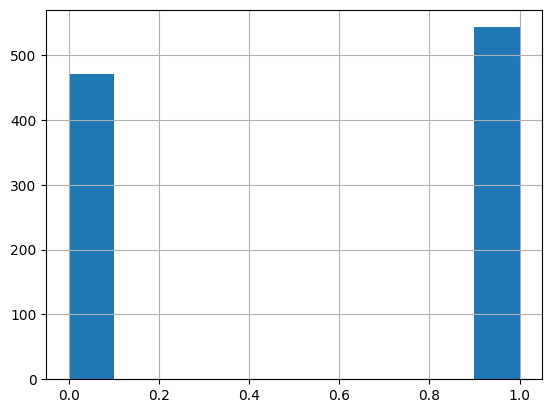

In [99]:
matches_details_df[~matches_details_df.radiant_win.isna()]\
    .radiant_win.astype(int).hist()

In [101]:
matches_with_chat = matches_details_df[
    ~matches_details_df.chat.isna()]

In [102]:
matches_with_chat.shape

(6, 46)

In [104]:
6 / 3000 * 100_000

200.0

In [133]:
one_chat = matches_with_chat.chat.values[5]

In [134]:
[c['type'] for c in one_chat]

['chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chatwheel',
 'chat',
 'chat',
 'chat',
 'chat',
 'chatwheel',
 'chatwheel',
 'chat']

In [135]:
one_chat

[{'time': 153,
  'type': 'chatwheel',
  'key': '9010',
  'slot': 3,
  'player_slot': 3},
 {'time': 174,
  'type': 'chatwheel',
  'key': '19001',
  'slot': 6,
  'player_slot': 129},
 {'time': 208,
  'type': 'chatwheel',
  'key': '9010',
  'slot': 3,
  'player_slot': 3},
 {'time': 210, 'type': 'chatwheel', 'key': '69', 'slot': 3, 'player_slot': 3},
 {'time': 308, 'type': 'chatwheel', 'key': '71', 'slot': 3, 'player_slot': 3},
 {'time': 364,
  'type': 'chatwheel',
  'key': '57001',
  'slot': 0,
  'player_slot': 0},
 {'time': 407, 'type': 'chatwheel', 'key': '71', 'slot': 0, 'player_slot': 0},
 {'time': 407, 'type': 'chatwheel', 'key': '71', 'slot': 0, 'player_slot': 0},
 {'time': 442, 'type': 'chatwheel', 'key': '1', 'slot': 3, 'player_slot': 3},
 {'time': 444, 'type': 'chatwheel', 'key': '69', 'slot': 3, 'player_slot': 3},
 {'time': 518, 'type': 'chatwheel', 'key': '7', 'slot': 8, 'player_slot': 131},
 {'time': 662,
  'type': 'chatwheel',
  'key': '9010',
  'slot': 3,
  'player_slot': 3}

In [136]:
[c['key'] for c in one_chat if c['type'] == 'chat']

['et,biot', 'уебище', '???', 'Посиди в таверне', 'Ебанат?']